In [1]:

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 

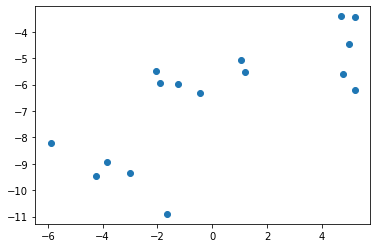

In [2]:
n_samples = 16
random_state = 255

X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1])

In [3]:
print(X.shape)
edges = []
base = 3.8

D = np.zeros(shape=(len(X), len(X)))
A = np.zeros(shape=(len(X), len(X)))
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if np.linalg.norm((X[i,:] - X[j,:])) < base:
            edges.append((i,j))
            A[i,j] = 1
            A[j,i] = 1
            D[i,i] +=1 
            D[j,j] +=1

L = D - A

(16, 2)


In [4]:
import networkx as nx
G = nx.Graph()
for i in range(len(X)):
    G.add_node(i, pos=X[i,:])
G.add_edges_from(edges)

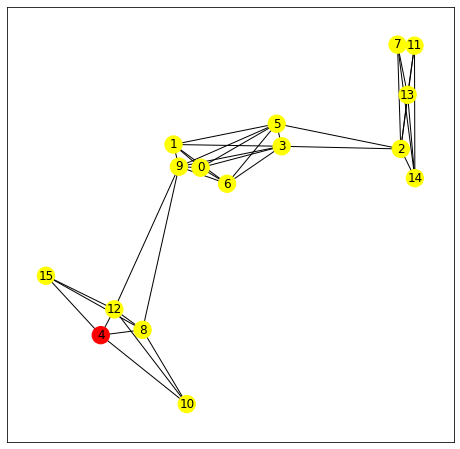

In [5]:
plt.figure(figsize=(8,8))
pos = nx.get_node_attributes(G, "pos")
nx.draw_networkx(G, pos, node_color=['red' if i==4 else 'yellow' for i in range(n_samples)])

In [6]:
print("Laplace Matrix")
for v in L:
    print(v)

Laplace Matrix
[ 5. -1.  0. -1.  0. -1. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
[-1.  5.  0. -1.  0. -1. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  6. -1.  0. -1.  0. -1.  0.  0.  0. -1.  0. -1. -1.  0.]
[-1. -1. -1.  6.  0. -1. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  4.  0.  0.  0. -1.  0. -1.  0. -1.  0.  0. -1.]
[-1. -1. -1. -1.  0.  6. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
[-1. -1.  0. -1.  0. -1.  5.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
[ 0.  0. -1.  0.  0.  0.  0.  4.  0.  0.  0. -1.  0. -1. -1.  0.]
[ 0.  0.  0.  0. -1.  0.  0.  0.  5. -1. -1.  0. -1.  0.  0. -1.]
[-1. -1.  0. -1.  0. -1. -1.  0. -1.  7.  0.  0. -1.  0.  0.  0.]
[ 0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  3.  0. -1.  0.  0.  0.]
[ 0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0.  4.  0. -1. -1.  0.]
[ 0.  0.  0.  0. -1.  0.  0.  0. -1. -1. -1.  0.  5.  0.  0. -1.]
[ 0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  4. -1.  0.]
[ 0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0. -1.  4. 

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(L)

Text(0.5, 1.0, 'Eigen Values of Laplace Matrix')

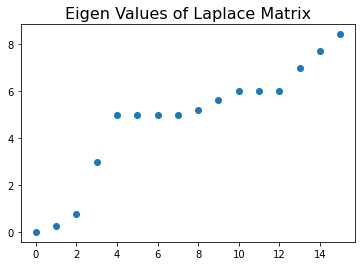

In [8]:
eigen_values_with_index = sorted([(i, e) for i,e in enumerate(eigen_values)], key=lambda x:x[1])
plt.scatter(range(len(eigen_values_with_index)), [e[1] for e in eigen_values_with_index])
plt.title("Eigen Values of Laplace Matrix", fontsize=16)

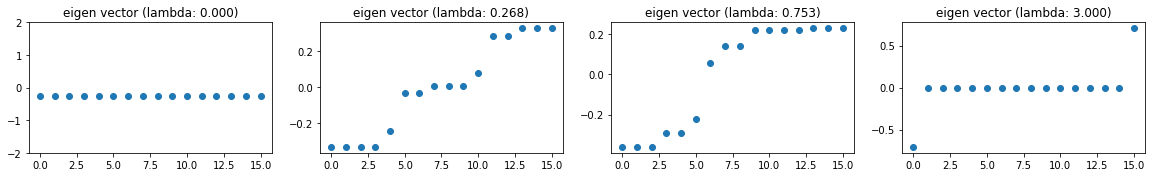

In [9]:
n_components  = 4
fig_size = (5* n_components, n_components*0.6) 
fig, axes = plt.subplots(1, n_components, figsize=fig_size)
for i in range(n_components):
    index, eigen_value = eigen_values_with_index[i]
    axes[i].scatter(range(len(eigen_values_with_index)), sorted(eigen_vectors[:, index]))
    axes[i].set_title(f"eigen vector (lambda: {eigen_value:.3f})")
    axes[i].set_title(f"eigen vector (lambda: {eigen_value:.3f})")
    if i==0:
        axes[i].set_yticks([-2,-1,0,1,2])

In [10]:
sorted_eigen_vector_indexs = [i[0] for i in eigen_values_with_index]
sorted_eigen_vectors = eigen_vectors[:, sorted_eigen_vector_indexs]

n_components = 3
U_subset = sorted_eigen_vectors[:, :n_components]
U_subset.shape

(16, 3)

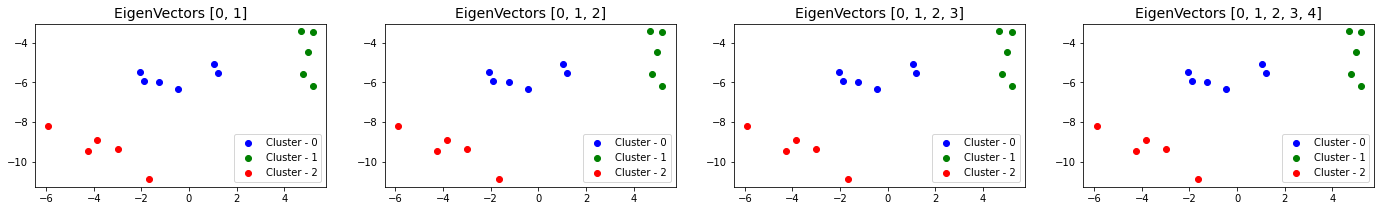

In [11]:
from sklearn.cluster import KMeans

min_ =2 
max_ = 5
number_cluster =3
fig_size = (8* (max_ - min_), (max_ - min_)) 
fig, axes = plt.subplots(1, (max_ - min_ +1), figsize=fig_size)

for j, n_components in enumerate(range(min_, max_+1)):
    U_subset = sorted_eigen_vectors[:, :n_components]
    km = KMeans(n_clusters=number_cluster)
    km.fit(U_subset)

    groups = {}
    colors = "bgrcmykw"
    for x, label in zip(X, km.labels_):
        if label in groups:
            groups[label].append(x)
        else:
            groups[label] = [x]

    for i, g in enumerate(groups):
        g = np.array(groups[g])
        axes[j].scatter(g[:,0], g[:,1], color=colors[i])

    axes[j].legend([f"Cluster - {i}" for i in range(number_cluster)], loc="lower right")
    axes[j].set_title(f"EigenVectors {str(list(range(n_components)))}", fontsize=14)


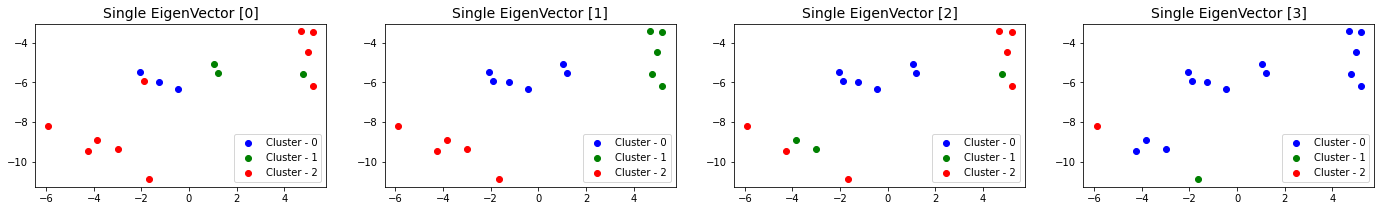

In [12]:

min_ = 1
max_ = 4
number_cluster = 3 

fig_size = (8* (max_ - min_), (max_ - min_)) 
fig, axes = plt.subplots(1, (max_ - min_ +1), figsize=fig_size)
for j, n_components in enumerate(range(min_, max_+1)):
    U_subset = sorted_eigen_vectors[:, n_components-1]
    km = KMeans(n_clusters=number_cluster)
    km.fit(U_subset.reshape(-1,1))

    groups = {}
    colors = "bgrcmykw"
    for x, label in zip(X, km.labels_):
        if label in groups:
            groups[label].append(x)
        else:
            groups[label] = [x]

    for i, g in enumerate(groups):
        g = np.array(groups[g])
        axes[j].scatter(g[:,0], g[:,1], color=colors[i])

    axes[j].legend([f"Cluster - {i}" for i in range(number_cluster)], loc="lower right")
    axes[j].set_title(f"Single EigenVector [{str(n_components-1)}]", fontsize=14)



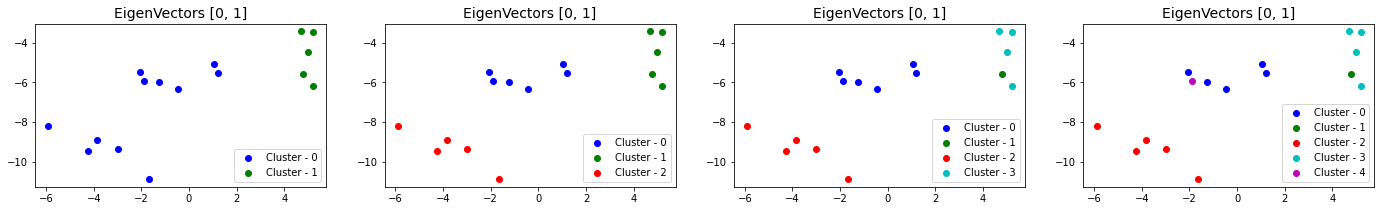

In [13]:

min_ =2 
max_ = 5
fig_size = (8* (max_ - min_), (max_ - min_)) 
fig, axes = plt.subplots(1, (max_ - min_ +1), figsize=fig_size)

for j, n_cluster in enumerate(range(min_, max_+1)):
    U_subset = sorted_eigen_vectors[:, :2]
    km = KMeans(n_clusters=n_cluster)
    km.fit(U_subset)

    groups = {}
    colors = "bgrcmykw"
    for x, label in zip(X, km.labels_):
        if label in groups:
            groups[label].append(x)
        else:
            groups[label] = [x]

    for i, g in enumerate(groups):
        g = np.array(groups[g])
        axes[j].scatter(g[:,0], g[:,1], color=colors[i])

    axes[j].legend([f"Cluster - {i}" for i in range(n_cluster)], loc="lower right")
    axes[j].set_title(f"EigenVectors {str(list(range(2)))}", fontsize=14)

In [14]:

min_ =2 
max_ = 7
fig_size = (4* (max_ - min_), (max_ - min_)*1.5) 
fig, axes = plt.subplots(2, 3, figsize=fig_size)

for j, n_cluster in enumerate(range(min_, max_+1)):
    U_subset = sorted_eigen_vectors[:, :n_cluster]
    km = KMeans(n_clusters=n_cluster)
    km.fit(U_subset)

    groups = {}
    colors = "bgrcmykw"
    for x, label in zip(X, km.labels_):
        if label in groups:
            groups[label].append(x)
        else:
            groups[label] = [x]

    for i, g in enumerate(groups):
        g = np.array(groups[g])
        axes[j//3][j%3].scatter(g[:,0], g[:,1], color=colors[i])

    axes[j//3][j%3].legend([f"Cluster - {i}" for i in range(n_cluster)], loc="lower right")
    axes[j//3][j%3].set_title(f"EigenVectors {str(list(range(n_cluster)))}", fontsize=14)

In [ ]:
degree_with_index = [ (i, D[i,i]) for i in range(len(D))]
sorted_degree_with_index = sorted(degree_with_index, key=lambda x:x[1])
for i in range(5):
    print(sorted_degree_with_index[i])